In [1]:
import pandas 
import sklearn 

In [2]:
dataFrame = pandas.read_csv('breast-cancer-wisconsin.data')
dataFrame

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
dataFrame['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

Alas 16 values are missing for 'Bare Nuclei'. It's the most important feature, as per the ExtraTreesClassifier below.  
It's sad to drop all the rows with it being = '?'. TODO: Perhaps we could do something better

In [5]:
dataFrame = dataFrame[dataFrame['Bare Nuclei'] != '?'].copy()
dataFrame['Bare Nuclei'] = dataFrame['Bare Nuclei'].astype('int64')
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


In [6]:
dataFrame['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [7]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


In [8]:
dataFrame['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [9]:
yesNoMapping = {2: 0, 4: 1}
dataFrame['Class'] = dataFrame['Class'].map(yesNoMapping)
dataFrame['Class'].value_counts(normalize=True)

0    0.650073
1    0.349927
Name: Class, dtype: float64

In [10]:
Y = dataFrame['Class']
X = dataFrame.drop(['Class','Sample code number'], axis=1, inplace=False)

In [11]:
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [12]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 683, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
Xscaled = StandardScaler().fit_transform(X)
Xscaled.shape

(683, 9)

Feature ranking:
1. feature 5 Bare Nuclei (0.233240)
2. feature 2 Uniformity of Cell Shape (0.184273)
3. feature 1 Uniformity of Cell Size (0.162898)
4. feature 7 Normal Nucleoli (0.099717)
5. feature 6 Bland Chromatin (0.084893)
6. feature 0 Clump Thickness (0.084310)
7. feature 3 Marginal Adhesion (0.077301)
8. feature 4 Single Epithelial Cell Size (0.063241)
9. feature 8 Mitoses (0.010127)


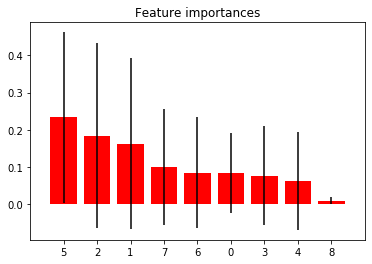

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250)
forest.fit(Xscaled, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

To account for the class imbalance, we use stratification during train/test split. And during cross validation in GridSearchCV (the default setting). The cross valudation is using 5 folds (the default setting).

In [15]:
testSize = 0.4
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(Xscaled, Y, test_size=testSize, stratify=Y)

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support
import os

def gridSearchCvAndReport(classifier, paramsSearchGrid, Xtrain, Xtest, Ytrain, Ytest):
    accuracyScorer = make_scorer(accuracy_score)
    precisionScorer = make_scorer(precision_score)
    recallScorer = make_scorer(recall_score)
    betaOfF=1
    fBetaScorer = make_scorer(fbeta_score, beta=betaOfF)
    scorings = {'accuracy':accuracyScorer, 'precision':precisionScorer, 'recall':recallScorer, 'fBeta':fBetaScorer}

    optimizer = GridSearchCV(
        classifier, paramsSearchGrid, scoring=scorings, refit='fBeta'
    )
    optimizer.fit(Xtrain, Ytrain)

    print("Best parameters found on train set:")
    print(optimizer.best_params_)
    print()
    print("Scores of all parameters sets:")
    print()
    accuracyMeans = optimizer.cv_results_['mean_test_accuracy']
    accuracyStds = optimizer.cv_results_['std_test_accuracy']
    precisionMeans = optimizer.cv_results_['mean_test_precision']
    precisionStds = optimizer.cv_results_['std_test_precision']
    recallMeans = optimizer.cv_results_['mean_test_recall']
    recallStds = optimizer.cv_results_['std_test_recall']
    fBetaMeans = optimizer.cv_results_['mean_test_fBeta']
    fBetaStds = optimizer.cv_results_['std_test_fBeta']
    for accuracyMean, accuracyStd, precisionMean, precisionStd, recallMean, recallStd, fBetaMean, fBetaStd, params in zip(accuracyMeans, accuracyStds, precisionMeans, precisionStds, recallMeans, recallStds, fBetaMeans, fBetaStds, optimizer.cv_results_['params']):
        #if params == optimizer.best_params_ :
            print("* accuracy: %0.3f (+/-%0.03f), precision: %0.3f (+/-%0.03f), recall: %0.3f (+/-%0.03f), fB: %0.3f (+/-%0.03f) for %r" \
                  % (accuracyMean, accuracyStd * 2, precisionMean, precisionStd * 2, recallMean, recallStd * 2, fBetaMean, fBetaStd * 2, params))
    print()
    print("Prediction on test set:")
    Ypredicted = optimizer.predict(Xtest)
    p_r_fBeta_s = precision_recall_fscore_support(Ytest, Ypredicted, beta=betaOfF, average='binary')
    print("accuracy: %0.2f; precision: %0.2f; recall: %0.2f; fB: %0.2f" % (accuracy_score(Ytest, Ypredicted, normalize=True), p_r_fBeta_s[0], p_r_fBeta_s[1], p_r_fBeta_s[2]))
    
    os.system("printf '\7'") #bell
    
def gridSearchCvAndReport2(getClassifier, paramsSearchGrid):
    gridSearchCvAndReport(getClassifier(), paramsSearchGrid, XTrain, XTest, YTrain, YTest)

In [17]:
from sklearn.linear_model import LogisticRegression
gridSearchCvAndReport2(lambda: LogisticRegression(), paramsSearchGrid=[
    {'solver':['liblinear','lbfgs'], 'C': [0.0005,0.001,0.005,0.05,0.1,0.5,1,5], 'penalty': ['l2'], 'class_weight': [None,'balanced']}
])

Best parameters found on train set:
{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

Scores of all parameters sets:

* accuracy: 0.971 (+/-0.025), precision: 0.959 (+/-0.065), recall: 0.958 (+/-0.051), fB: 0.958 (+/-0.035) for {'C': 0.0005, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
* accuracy: 0.704 (+/-0.032), precision: 1.000 (+/-0.000), recall: 0.154 (+/-0.093), fB: 0.264 (+/-0.134) for {'C': 0.0005, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
* accuracy: 0.973 (+/-0.029), precision: 0.959 (+/-0.065), recall: 0.965 (+/-0.062), fB: 0.962 (+/-0.040) for {'C': 0.0005, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
* accuracy: 0.968 (+/-0.040), precision: 0.966 (+/-0.073), recall: 0.944 (+/-0.093), fB: 0.954 (+/-0.058) for {'C': 0.0005, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
* accuracy: 0.971 (+/-0.025), precision: 0.959 (+/-0.065), recall: 0.958 (+/-0.051), fB: 0.958 (+/-0.035

In [18]:
gridSearchCvAndReport2(lambda: SVC(), paramsSearchGrid=[
    {'kernel': ['linear'], 'C': [0.5,1,10], 'gamma':['scale','auto'], 'class_weight': [None,'balanced']}, 
    {'kernel': ['rbf'], 'C': [0.1,0.5,1,2,5,8,10,100,1000], 'gamma':['scale','auto'], 'class_weight': [None,'balanced']},
    {'kernel': ['poly'], 'degree':[2,3,4], 'C': [0.05,0.1,0.5,1,5], 'gamma':['scale','auto'], 'class_weight': [None,'balanced']},
    {'kernel': ['sigmoid'], 'C': [0.05,0.1,0.5,1,5], 'gamma':['scale','auto'], 'class_weight': [None,'balanced']}
])

Best parameters found on train set:
{'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'sigmoid'}

Scores of all parameters sets:

* accuracy: 0.973 (+/-0.032), precision: 0.959 (+/-0.062), recall: 0.965 (+/-0.076), fB: 0.962 (+/-0.047) for {'C': 0.5, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
* accuracy: 0.973 (+/-0.032), precision: 0.959 (+/-0.062), recall: 0.965 (+/-0.076), fB: 0.962 (+/-0.047) for {'C': 0.5, 'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
* accuracy: 0.978 (+/-0.024), precision: 0.953 (+/-0.050), recall: 0.986 (+/-0.055), fB: 0.969 (+/-0.034) for {'C': 0.5, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
* accuracy: 0.978 (+/-0.024), precision: 0.953 (+/-0.050), recall: 0.986 (+/-0.055), fB: 0.969 (+/-0.034) for {'C': 0.5, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'}
* accuracy: 0.973 (+/-0.036), precision: 0.953 (+/-0.066), recall: 0.972 (+/-0.081), fB: 0.962 (+/-0.052) for {'C': 1, 'c